# SETUP

In [113]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes
## for statistical tests
import scipy
# import statsmodels.formula.api as smf
# import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
# from lime import lime_tabular
import matplotlib.ticker as plticker
import pickle

In [114]:
dfs = pd.read_csv("train.csv")
dfs.head()

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,3222,1,1,1,14,1,1,1,13,28,...,0,6,7,6,14.714286,0,11.1,0.6,2.02,Graduate
1,2388,1,8,4,9,1,1,1,23,14,...,0,5,10,2,12.500000,0,11.1,0.6,2.02,Dropout
2,1865,1,12,1,17,0,1,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,Graduate
3,652,1,12,1,12,1,12,1,1,5,...,0,8,11,7,12.614286,0,12.7,3.7,-1.70,Graduate
4,4220,1,1,1,14,1,1,1,19,28,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout


In [115]:
dfs = pd.get_dummies(dfs, columns=['Marital status'])
dfs = pd.get_dummies(dfs, columns=['Application mode'])
dfs = pd.get_dummies(dfs, columns=['Course'])
dfs = pd.get_dummies(dfs, columns=['Previous qualification'])
dfs = pd.get_dummies(dfs, columns=['Nacionality'])
dfs = pd.get_dummies(dfs, columns=["Mother's occupation"])
dfs = pd.get_dummies(dfs, columns=["Father's occupation"])
dfs = dfs.drop(["Mother's qualification", "Father's qualification", "Curricular units 2nd sem (credited)" ], axis=1)
dfs.head()

,Id,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Father's occupation_36,Father's occupation_37,Father's occupation_38,Father's occupation_39,Father's occupation_40,Father's occupation_41,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45
0,3222,1,1,1,0,0,1,0,1,20,...,0,0,0,0,0,0,0,0,0,0
1,2388,4,1,1,0,0,1,1,1,18,...,0,0,0,0,0,0,0,0,0,0
2,1865,1,0,0,0,0,1,1,0,26,...,0,0,0,0,0,0,0,0,0,0
3,652,1,1,0,0,0,1,0,0,24,...,0,0,0,0,0,0,0,0,0,0
4,4220,1,1,0,0,0,1,0,0,22,...,0,0,0,0,0,0,0,0,0,0


In [116]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(dfs.drop("Category", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dfs.drop("Category", axis=1).columns, index=dfs.index)
dtf_scaled["Category"] = dfs["Category"]
dtf_scaled.head()

,Id,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Father's occupation_37,Father's occupation_38,Father's occupation_39,Father's occupation_40,Father's occupation_41,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Category
0,0.728959,0.166667,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.056604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduate
1,0.540271,0.666667,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.018868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dropout
2,0.421946,0.166667,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.169811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduate
3,0.147511,0.166667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.132075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Graduate
4,0.954751,0.166667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.094340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dropout


<AxesSubplot: xlabel='selection', ylabel='features'>

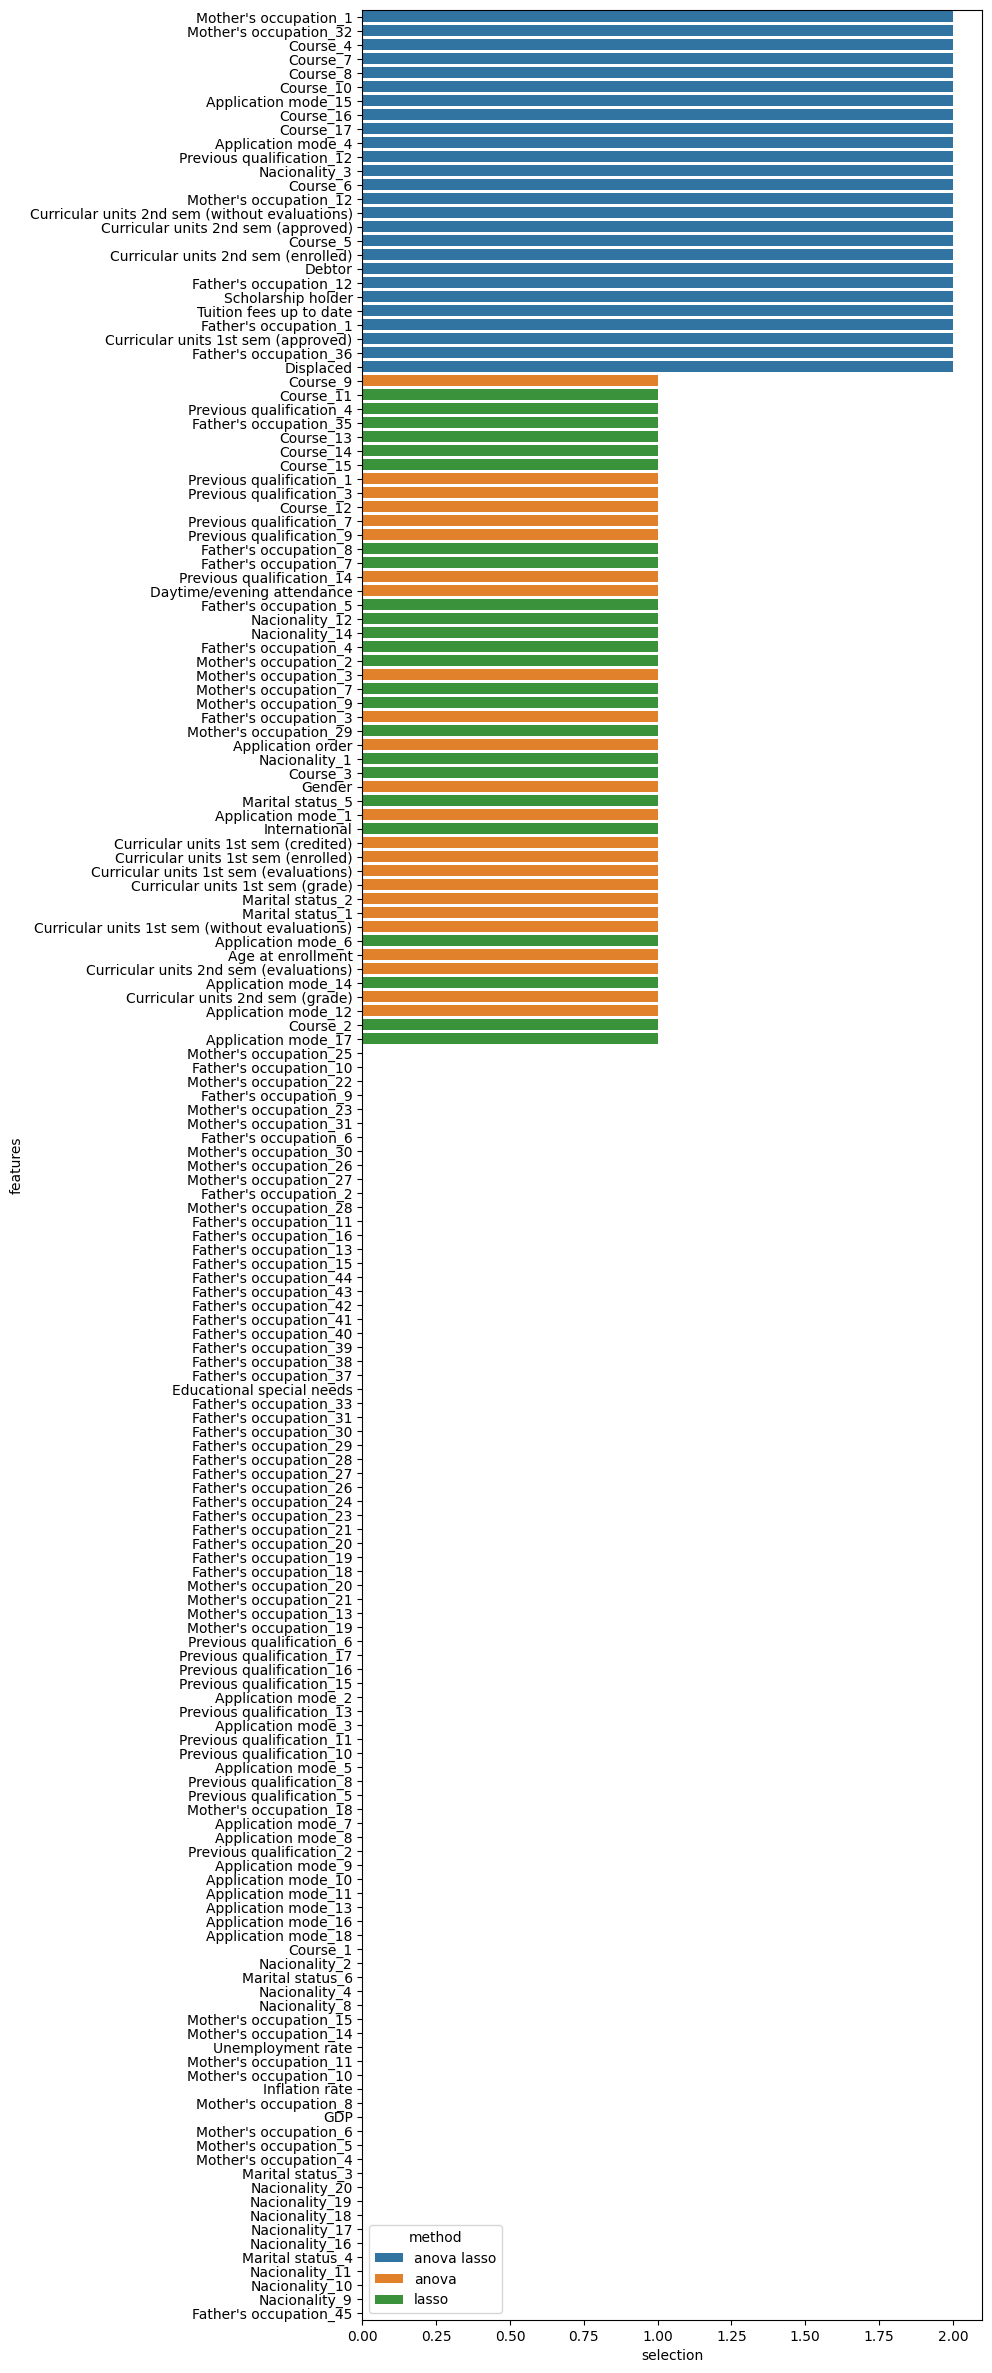

In [117]:
X = dfs.drop(["Category", "Id"], axis=1).values
y = dfs["Category"].values
feature_names = dfs.drop(["Category", "Id"], axis=1).columns

## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=50).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=50).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
plt.figure(figsize=(8,30))
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

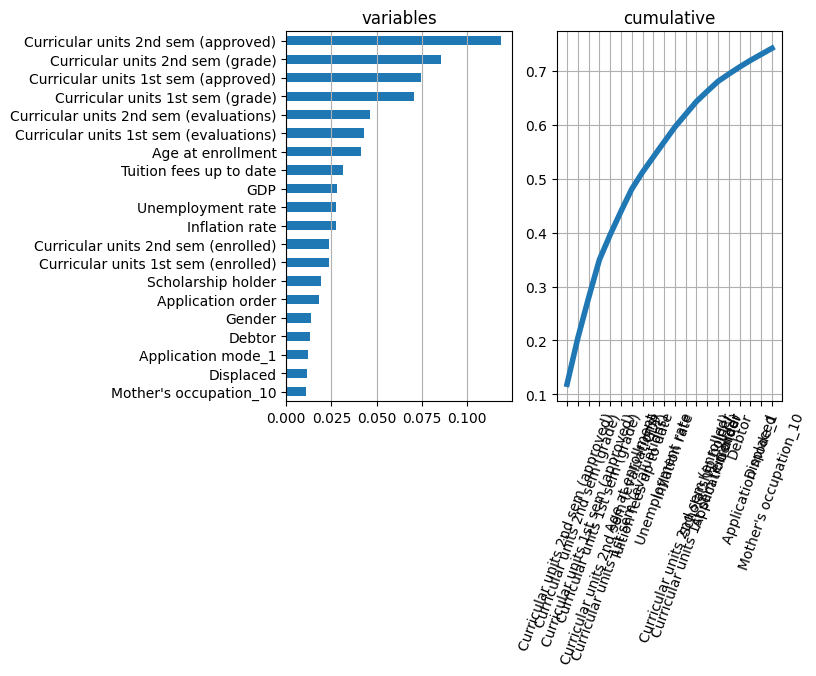

,IMPORTANCE,cumsum
VARIABLE,,
Curricular units 2nd sem (approved),0.118879,0.118879
Curricular units 2nd sem (grade),0.085538,0.204417
Curricular units 1st sem (approved),0.074530,0.278947
Curricular units 1st sem (grade),0.070597,0.349544
Curricular units 2nd sem (evaluations),0.046519,0.396063
Curricular units 1st sem (evaluations),0.043209,0.439272
Age at enrollment,0.041307,0.480579
Tuition fees up to date,0.031364,0.511943
GDP,0.028230,0.540173


In [118]:
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dfs
dfs_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False).nlargest(20,"IMPORTANCE")
dfs_importances['cumsum'] = dfs_importances['IMPORTANCE'].cumsum(axis=0)
dfs_importances = dfs_importances.set_index("VARIABLE")
    
## Plot

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].title.set_text('variables')
dfs_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dfs_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dfs_importances)), xticklabels=dfs_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()
dfs_importances.head(20)

Text(0.5, 1.0, 'pearson correlation')

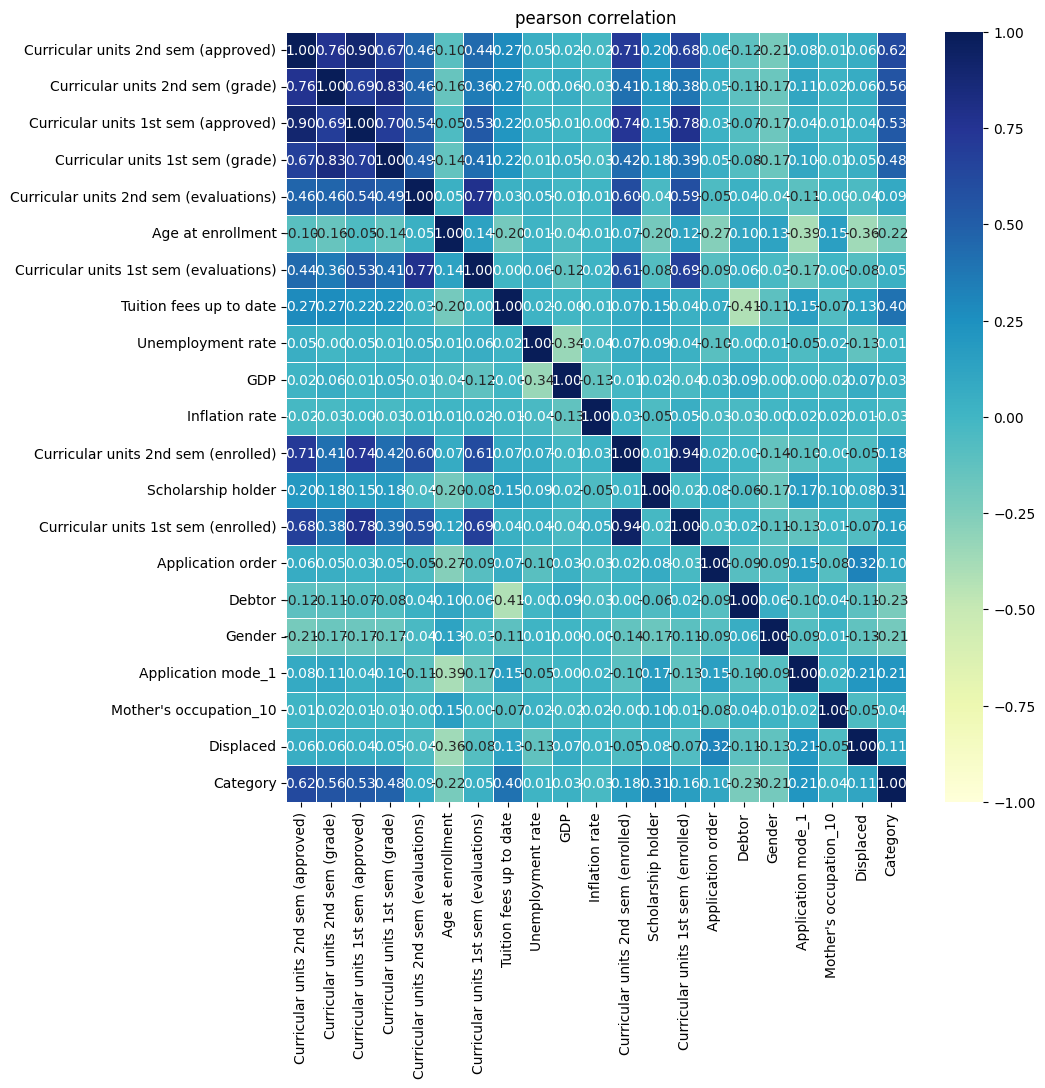

In [119]:
df_hm = dfs[["Curricular units 2nd sem (approved)",
"Curricular units 2nd sem (grade)",
"Curricular units 1st sem (approved)",	
"Curricular units 1st sem (grade)",
"Curricular units 2nd sem (evaluations)",
"Age at enrollment",
"Curricular units 1st sem (evaluations)",
"Tuition fees up to date",
"Unemployment rate",
"GDP",
"Inflation rate",
"Curricular units 2nd sem (enrolled)",
"Scholarship holder",
"Curricular units 1st sem (enrolled)",
"Application order",
"Debtor",
"Gender",
"Application mode_1",
"Mother's occupation_10",
"Displaced", "Category"]]

corr_matrix = df_hm.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [120]:
#remove features with too much dependencies to each others

dff = dfs[["Id", "Curricular units 2nd sem (approved)",
"Curricular units 2nd sem (grade)",
"Curricular units 2nd sem (evaluations)",
"Age at enrollment",
"Tuition fees up to date",
"Unemployment rate",
"GDP",
"Inflation rate",
"Curricular units 2nd sem (enrolled)",
"Scholarship holder",
"Application order",
"Debtor",
"Gender",
"Application mode_1",
"Mother's occupation_10",
"Displaced", "Category"]]

In [121]:

X_names = ["Curricular units 2nd sem (approved)",
"Curricular units 2nd sem (grade)",
"Curricular units 2nd sem (evaluations)",
"Age at enrollment",
"Tuition fees up to date",
"Unemployment rate",
"GDP",
"Inflation rate",
"Curricular units 2nd sem (enrolled)",
"Scholarship holder",
"Application order",
"Debtor",
"Gender",
"Application mode_1",
"Mother's occupation_10",
"Displaced"]

X_train = dfs[X_names].values
y_train = dfs["Category"].values

## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.1,0.01],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250],  #number of trees added to the model
'max_depth':[4,5],    #maximum depth of the tree
'min_samples_split':[4,6],    #sets the minimum number of samples to split
'min_samples_leaf':[3,5],     #the minimum number of samples to form a leaf
'subsample':[0.9,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=5, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

Best Model parameters: {'subsample': 1, 'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 4, 'learning_rate': 0.01}
Best Model mean accuracy: 0.7592953730856957


In [ ]:
## train
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model_academic_V2.sav'
pickle.dump(model, open(filename, 'wb'))